<a href="https://colab.research.google.com/github/aislam388/Hybrid-Technique/blob/main/Hybrid_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.image as mimg
# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

import tensorflow as tf
from plotly.graph_objs import *
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers
import keras

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

In [ ]:
input_path = "/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/"
# train and valid = flowr_path
train = input_path+"/Training/"
valid = input_path+"/Validation/"

In [ ]:
# classes = flower_types
classes = os.listdir(train)
print("No of classes: ", len(classes))
print("Class Labels: ", classes)

No of classes:  2
Class Labels:  ['Positive', 'Negative']


In [ ]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
weights_vgg16 = "/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
conv_base_16= VGG16(weights=weights_vgg16,
                 include_top= False,
                 input_shape = (224,224,3))

In [ ]:
from keras.applications import VGG19
from keras.applications.vgg16 import preprocess_input
weights_vgg19 = "/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_vgg16 = "/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
conv_base_19= VGG19(weights=weights_vgg19,
                 include_top= False,
                 input_shape = (224,224,3))

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from PIL import Image


In [ ]:
def _get_features_16(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  vgg16_features = conv_base_16.predict(img_data)
  return vgg16_features

In [ ]:
def _get_features_19(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  vgg19_features = conv_base_19.predict(img_data)
  return vgg19_features

In [ ]:
# datagen = ImageDataGenerator(rescale=1./255)
# batch_size = 10

In [ ]:
# # for vgg
# def extract_features(directory, sample_count):
#     features = [np.zeros((sample_count, 7,7, 512)),np.zeros((sample_count,7,7,512)),np.zeros((sample_count,7,7,512))]
#     labels = [np.zeros((sample_count, 2))]

#     generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory,
#         target_size=(240, 240),
#         batch_size = batch_size, 
#         class_mode='categorical')

#     i = 0

#     print('Entering for loop...');

    
#     for inputs_batch, labels_batch in generator:
#         features_batch = conv_base.predict(inputs_batch)
#         features[i * batch_size : (i + 1) * batch_size] = features_batch
#         labels[i * batch_size : (i + 1) * batch_size] = labels_batch
#         i += 1
#         if i * batch_size >= sample_count:
#             break
#     return features, labels

In [ ]:
# # for SVM
# def _get_features(img_path):
#   img = image.load_img(img_path, target_size=(224,224))
#   img_data = image.img_to_array(img)
#   img_data = np.expand_dims(img_data, axis=0)
#   img_data = preprocess_input(img_data)
#   vgg16_features = conv_base.predict(img_data)
#   return vgg16_features

In [ ]:
# train_features, train_labels = extract_features(train, 962)
# validation_features, validation_labels = extract_features(valid, 206)

In [ ]:
# train_features = np.reshape(train_features, (962, 7 * 7 * 512))
# validation_features = np.reshape(validation_features, (206, 7 * 7 * 512))

In [ ]:
# print(train_features.shape)

SVM Attempt

In [ ]:
import pandas as pd
train_list = []

# images = species_num, labels = species, train_list = train, train = train_dir
for images, labels in enumerate(classes):
  for file in os.listdir(os.path.join(train+ labels)):
      train_list.append(['/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/Training/{}/{}'.format(labels, file), images, labels])
        
train_list = pd.DataFrame(train_list, columns=['file', 'images', 'labels'])

print('Training Data: ',train_list.shape)

Training Data:  (962, 3)


In [ ]:
print(train_list)

                                                  file  images    labels
0    /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       0  Positive
1    /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       0  Positive
2    /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       0  Positive
3    /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       0  Positive
4    /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       0  Positive
..                                                 ...     ...       ...
957  /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       1  Negative
958  /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       1  Negative
959  /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       1  Negative
960  /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       1  Negative
961  /content/drive/My Drive/LIDC-IDRI-0001/01-01-2...       1  Negative

[962 rows x 3 columns]


In [ ]:
features_16 = []
for i in range(len(train_list)):
  features_16.append(_get_features_16(train_list['file'][i]))

In [ ]:
features_19 = []
for i in range(len(train_list)):
  features_19.append(_get_features_19(train_list['file'][i]))

In [ ]:
print(features_16[1],features_16[1].shape)

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          9.906739
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [11.288255    0.         11.650242   ...  0.          0.
     0.        ]
   ...
   [ 0.          7.3503003   3.5132656  ...  3.4352694   0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          9.771076
     0.        ]]

  [[ 0.          0.          0.         ...  0

In [ ]:
tensor_16=[]
for i in range(len(features_16)):
  tensor_16.append(tf.convert_to_tensor(features_16[i]))

In [ ]:
flat1=[]
for i in range(len(features_16)):
  tensor = tf.convert_to_tensor(features_16[i])
  flat1.append(Flatten()(tensor))

In [ ]:
flat2=[]
for i in range(len(features_19)):
  tensor = tf.convert_to_tensor(features_19[i])
  flat2.append(Flatten()(tensor))

In [ ]:
merge = []
for i in range(len(features_16)):
  merge.append(concatenate([flat1[i],flat2[i]]))

In [ ]:
print(merge[1],merge[1].shape)

tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 50176), dtype=float32) (1, 50176)


In [ ]:
# _input= keras.Input(shape=(1,50176))
# output_list = []
# # for i in range(len(merge)):
# dense1 = Dense(10,activation="relu")(merge[i])
# dense2 = Dense(10,activation="relu")(dense1)
# output = Dense(2,activation="softmax")(dense2)
# output_list.append(output)

# # model = Model(inputs=_input,outputs=output)

In [ ]:
# print(output)

In [ ]:
# model = models.Sequential()
# model.add(layers.Dense(2048, activation='relu')(tensor_16[1]))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128, activation='relu', input_dim=7 * 7 * 512))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(2, activation='softmax'))

SVM


In [ ]:
basepath = "/content/drive/My Drive/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192/"
class1 = os.listdir(basepath + "Positivepng/")
class2 = os.listdir(basepath + "Negativepng/")

In [ ]:
data = {'Positivepng': class1[:680], 
        'Negativepng': class2[:680], 
        'test': [class1[681], class2[681]]}

In [ ]:
features = {"Positivepng":[], "Negativepng":[], "test":[]}
test_features = []
# test_features2 for features from vgg19
test_features2 =[]
test_imgs = []
lables=[]

for label, val in data.items():
  # print(label)
  for k, each in enumerate(val):
    # print(k,each)
    if label == "test" and k == 0:
      img_path = basepath + "/Positivepng/" + each 
      # print(img_path)
      test_imgs.append(img_path)
    elif label == "test" and k == 1:
      img_path = basepath + "/Negativepng/" + each
      # print(img_path)
      test_imgs.append(img_path)
    else: 
      img_path = basepath + label.title() + "/" + each
      # print(img_path)
      # print(label.title())
      feats = _get_features_16(img_path)
      feats2 = _get_features_19(img_path)
    # feats = np.resize(feats,(224,224,3))
      test_features.append(feats)
      test_features2.append(feats2)
    # labels.append(labels)
    # print("dim: ",feats.ndim, feats.shape, feats.dtype)
    # print(type(feats))

      features[label].append(feats.flatten())
      features[label].append(feats2.flatten())
    # print(feats,labels)

In [ ]:
print(test_features)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# implemnting dtaframe for vgg16
import pandas as pd
test_label =[]
dataset = pd.DataFrame(
)

In [ ]:
import pandas as pd
test_label=[]
dataset = pd.DataFrame()

for label, feats in features.items():
    # print(label,feats)
    test_label.append(label)
    temp_df = pd.DataFrame(feats)
    temp_df['label'] = label
    dataset = dataset.append(temp_df, ignore_index=True)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,25049,25050,25051,25052,25053,25054,25055,25056,25057,25058,25059,25060,25061,25062,25063,25064,25065,25066,25067,25068,25069,25070,25071,25072,25073,25074,25075,25076,25077,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,35.489578,0.0,0.0,0.0,0.0,0.0,0.0,8.161168,0.182581,0.0,0.0,0.0,0.0,0.0,0.0,9.253778,0.0,Positivepng
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.022945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.966062,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.500797,1.492267,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Positivepng
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,33.186703,0.0,0.0,0.0,0.0,0.0,0.0,8.186379,0.472466,0.0,0.0,0.0,0.0,0.0,0.0,9.421498,0.0,Positivepng
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.846587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.536201,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.272427,0.277553,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Positivepng
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.797628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,33.471375,0.0,0.0,0.0,0.0,0.0,0.0,7.080626,0.676197,0.0,0.0,0.0,0.0,0.0,0.0,10.279336,0.0,Positivepng


In [ ]:
y = dataset[dataset.label != 'test'].label
X = dataset[dataset.label != 'test'].drop('label', axis=1)

In [ ]:
print(y.shape, y.ndim)
print(X.shape, X.ndim)

(2720,) 1
(2720, 25088) 2


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
print(Xtrain[:-1])

      0      1      2      3      4      ...  25083  25084  25085      25086  25087
1331    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   0.000000    0.0
2396    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   7.262002    0.0
2043    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   0.000000    0.0
1899    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   0.000000    0.0
784     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   7.496643    0.0
...     ...    ...    ...    ...    ...  ...    ...    ...    ...        ...    ...
1100    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0  13.796495    0.0
1388    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0  13.566526    0.0
261     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   0.000000    0.0
1296    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   6.118498    0.0
1291    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0   0.000000

In [ ]:
import time
start = time.time()
from sklearn import svm
from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

Running time: 116.2748 seconds


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy on y_test:",accuracy_score(ytest, preds))

Accuracy on y_test: 0.8786764705882353


Text(0.5, 1.0, 'Confusion Matrix')

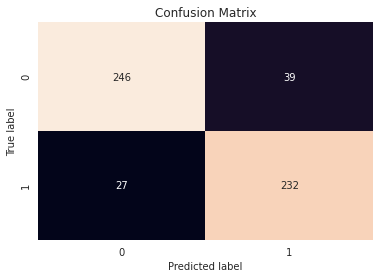

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(ytest, preds)
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

Fine Tuning

In [ ]:
# model = models.Sequential()
# model.add(layers.Dense(2048, activation='relu', input_dim=7 * 7 * 512))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128, activation='relu', input_dim=7 * 7 * 512))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(2, activation='softmax'))

In [ ]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

In [ ]:
# history = model.fit(train_features, train_labels,
#                     epochs=25,
#                     batch_size=16,
#                     validation_data=(validation_features, validation_labels))

With Augemnatation

In [ ]:
# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(2, activation='softmax'))

In [ ]:
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=15,
#         width_shift_range=0.05,
#         height_shift_range=0.05,
#         shear_range=0.05,
#         # zoom_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train,
#         target_size=(240, 240),  # all images will be resized to 240x240
#         batch_size=batch_size,
#         class_mode='categorical')  # more than two classes

# validation_generator = test_datagen.flow_from_directory(
#         valid,
#         target_size=(240, 240),
#         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle = False
# )

In [ ]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.Adam(lr=2e-5),
#               metrics=['acc'])

In [ ]:
# history = model.fit_generator(
#           train_generator,
#           epochs=30,
#           validation_data=validation_generator)

Fine Tuning

In [ ]:
# conv_base.trainable = True

# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.Adam(lr=2e-5),
#               metrics=['acc'])

In [ ]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=50)

In [ ]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs_range = range(1, len(history.epoch) + 1)

# plt.figure(figsize=(15,5))

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Train Set')
# plt.plot(epochs_range, val_acc, label='Val Set')
# plt.legend(loc="best")
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Train Set')
# plt.plot(epochs_range, val_loss, label='Val Set')
# plt.legend(loc="best")
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Model Loss')

# plt.tight_layout()
# plt.show()

Wrong below this

In [ ]:
# # A list that is going to contain tuples: (species of the flower, corresponding image path)
# lst_scans = []
# # species = categories
# for categories in classes:
#     # Get all the file names, all_scans = all_flowers
#     all_scans = os.listdir(train +"/"+ categories )
#     # Add then to the list
#     for scan in all_scans:
#         lst_scans.append((categories, (train /categories + "/" + scan)))

# # Build a dataframe        
# scans = pd.DataFrame(data=scans, columns=['category', 'image'], index=None)
# scans.head()

In [ ]:
# Parameters for Image Generator
# params = {'rescale':1./255, 'rotation_range':40, 'zoom_range':0.15, 'width_shift_range':0.2, 'height_shift_range':0.2, 'shear_range':0.05, 'horizontal_flip':True, 'featurewise_std_normalization':True, 'featurewise_center':True, 'fill_mode':'nearest'}

# # Image Data Generator configuration
# image_gen = ImageDataGenerator(**params)
    
# # Train Split
# train_generator  = image_gen.flow_from_directory(
# directory= '/mnt/4A34DB4C34DB39A1/Miscellaneous/MSDS Datasets/Finalized/Train/',
# batch_size=16,
# target_size=(224, 224),
# color_mode="rgb",
# class_mode="binary",
# shuffle=True,
# seed=42)
    
# # Validation Split
# valid_generator  = image_gen.flow_from_directory(
# directory= '/mnt/4A34DB4C34DB39A1/Miscellaneous/MSDS Datasets/Finalized/Validate/',
# batch_size=16,
# target_size=(224, 224),
# color_mode="rgb",
# class_mode="binary",
# shuffle=True,
# seed=42)
    
# # Test Split
# test_generator  = image_gen.flow_from_directory(
# directory= '/mnt/4A34DB4C34DB39A1/Miscellaneous/MSDS Datasets/Finalized/Test/',
# batch_size=16,
# target_size=(224, 224),
# color_mode="rgb",
# class_mode="binary",
# shuffle=True,
# seed=42)